In [4]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns

cleaned_data_path = Path("data_clean_351.csv")
cleaned_data = pd.read_csv(cleaned_data_path) 


cleaned_data.head()

,gender,hs_gpa,year_of_study,field,current_gpa,off_campus,monthly_allowance,scholarship,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed,relationship,parents_approval,parent_relationship
0,Female,76.0,2,Arts & Social Sciences,72.0,Yes,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2,Economic & Management Sciences,75.0,Yes,R 7001 - R 8000,Yes,8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1,AgriSciences,55.0,Yes,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2,Engineering,84.0,Yes,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2,Arts & Social Sciences,52.0,Yes,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [5]:
#add a count column to include a nurmeric variable
cleaned_data["drink_count"] = cleaned_data.groupby(["field", "drinks_consumed"])["field"].transform("count")
cleaned_data["study_count"] = cleaned_data.groupby(["field", "study_hours"])["field"].transform("count")
cleaned_data

,gender,hs_gpa,year_of_study,field,current_gpa,off_campus,monthly_allowance,scholarship,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed,relationship,parents_approval,parent_relationship,drink_count,study_count
0,Female,76.0,2,Arts & Social Sciences,72.0,Yes,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close,9,8
1,Male,89.0,2,Economic & Management Sciences,75.0,Yes,R 7001 - R 8000,Yes,8+,Only weekends,3-5,4+,0,No,Yes,Very close,36,51
2,Male,76.0,1,AgriSciences,55.0,Yes,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close,7,4
3,Male,89.0,2,Engineering,84.0,Yes,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close,6,4
4,Female,74.0,2,Arts & Social Sciences,52.0,Yes,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair,12,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,Female,74.0,2,Economic & Management Sciences,60.0,Yes,R 6001 - R 7000,No,5-8,Only weekends,1-3,0,3,No,No,Close,45,42
347,Female,73.0,2,Economic & Management Sciences,58.0,Yes,R 6001 - R 7000,Yes,5-8,1,8+,0,0,Yes,Yes,Very close,48,42
348,Female,86.0,1,Other,0.0,Yes,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close,3,1
349,Male,85.0,0,Economic & Management Sciences,0.0,Yes,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close,54,38


In [6]:
cleaned_data.field.value_counts()

field
Economic & Management Sciences    192
Science                            46
Arts & Social Sciences             39
Engineering                        31
AgriSciences                       18
Law                                 8
Medicine and Health Services        8
Education                           5
Other                               4
Name: count, dtype: int64

In [7]:
# Create Subset for Necessary field data for research question
study_hours = cleaned_data.study_hours
current_gpa = cleaned_data.current_gpa
drinks_consumed = cleaned_data.drinks_consumed
partying_frequency = cleaned_data.partying_frequency
study_field = cleaned_data.field

field_data = {
    "Study Field": study_field,
    "Study Hours": study_hours,
    "Current GPA": current_gpa,
    "Drinks Consumed": drinks_consumed,
    "Partying Frequency": partying_frequency,
}

field_data = pd.DataFrame(field_data)

# Display the DataFrame
field_data

,Study Field,Study Hours,Current GPA,Drinks Consumed,Partying Frequency
0,Arts & Social Sciences,8+,72.0,8+,Only weekends
1,Economic & Management Sciences,8+,75.0,3-5,Only weekends
2,AgriSciences,3-5,55.0,8+,2
3,Engineering,3-5,84.0,8+,3
4,Arts & Social Sciences,3-5,52.0,5-8,Only weekends
...,...,...,...,...,...
346,Economic & Management Sciences,5-8,60.0,1-3,Only weekends
347,Economic & Management Sciences,5-8,58.0,8+,1
348,Other,5-8,0.0,3-5,2
349,Economic & Management Sciences,1-3,0.0,5-8,4+


In [8]:
# Create Subset for Necessary field data for research questions
drinks_consumed = cleaned_data.drinks_consumed
study_field = cleaned_data.field
drink_count = cleaned_data.drink_count
study_hours = cleaned_data.study_hours
study_count = cleaned_data.study_count

field_data3 = {
    "Study Field": study_field,
    "Drinks Consumed": drinks_consumed,
    "Drink Count": drink_count,
    "Study Hours": study_hours,
    "Study Count": study_count
}
field_data3= pd.DataFrame(field_data3)
# Display the DataFrame
field_data3

,Study Field,Drinks Consumed,Drink Count,Study Hours,Study Count
0,Arts & Social Sciences,8+,9,8+,8
1,Economic & Management Sciences,3-5,36,8+,51
2,AgriSciences,8+,7,3-5,4
3,Engineering,8+,6,3-5,4
4,Arts & Social Sciences,5-8,12,3-5,18
...,...,...,...,...,...
346,Economic & Management Sciences,1-3,45,5-8,42
347,Economic & Management Sciences,8+,48,5-8,42
348,Other,3-5,3,5-8,1
349,Economic & Management Sciences,5-8,54,1-3,38


In [9]:
# Narrow down dataset to include specified fields
required_fields = ["Economic & Management Sciences", "Science", "Arts & Social Sciences", "Engineering"]
df_narrowed = field_data3.loc[field_data3["Study Field"].isin(required_fields)]

df_narrowed

,Study Field,Drinks Consumed,Drink Count,Study Hours,Study Count
0,Arts & Social Sciences,8+,9,8+,8
1,Economic & Management Sciences,3-5,36,8+,51
3,Engineering,8+,6,3-5,4
4,Arts & Social Sciences,5-8,12,3-5,18
5,Engineering,3-5,9,8+,18
...,...,...,...,...,...
343,Economic & Management Sciences,8+,48,0,15
345,Economic & Management Sciences,3-5,36,5-8,42
346,Economic & Management Sciences,1-3,45,5-8,42
347,Economic & Management Sciences,8+,48,5-8,42


In [10]:
pd.crosstab(index = df_narrowed["Study Field"], columns = df_narrowed["Drinks Consumed"], values = df_narrowed["Drink Count"], aggfunc = 'mean')

Drinks Consumed,0,1-3,3-5,5-8,8+
Study Field,,,,,
Arts & Social Sciences,1.0,7.0,10.0,12.0,9.0
Economic & Management Sciences,9.0,45.0,36.0,54.0,48.0
Engineering,1.0,5.0,9.0,10.0,6.0
Science,7.0,11.0,14.0,7.0,7.0


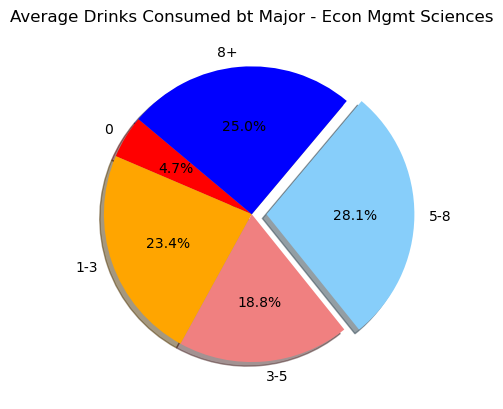

In [11]:
# Labels for the sections of our pie chart (ECONOMIC & MANAGEMENT SCIENCES)
labels = ["0", "1-3", "3-5", "5-8", "8+"]

# The values of each section of the pie chart
sizes = [9, 45, 36, 54, 48]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "blue"]

# Tells matplotlib to separate the "5-8" section from the others
explode = (0, 0, 0, 0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('Average Drinks Consumed bt Major - Econ Mgmt Sciences')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

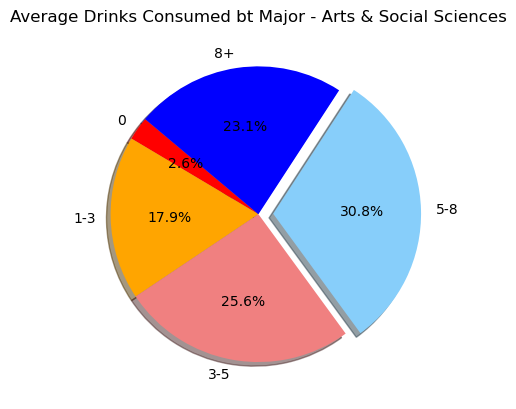

In [12]:
# Labels for the sections of our pie chart (ARTS & SOCIAL SCIENCES)
labels = ["0", "1-3", "3-5", "5-8", "8+"]

# The values of each section of the pie chart
sizes = [1, 7, 10, 12, 9]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "blue"]

# Tells matplotlib to separate the "5-8" section from the others
explode = (0, 0, 0, 0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('Average Drinks Consumed bt Major - Arts & Social Sciences')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

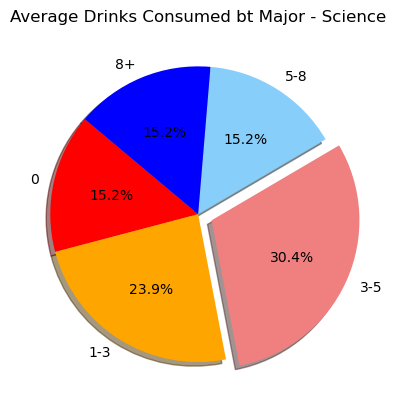

In [13]:
# Labels for the sections of our pie chart (SCIENCE)
labels = ["0", "1-3", "3-5", "5-8", "8+"]

# The values of each section of the pie chart
sizes = [7, 11, 14, 7, 7]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "blue"]

# Tells matplotlib to separate the "5-8" section from the others
explode = (0, 0, 0.1, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('Average Drinks Consumed bt Major - Science')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

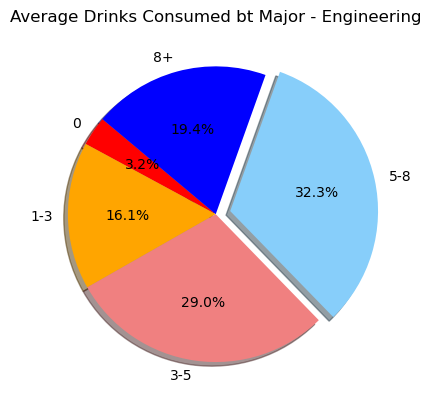

In [14]:
# Labels for the sections of our pie chart (ENGINEERING)
labels = ["0", "1-3", "3-5", "5-8", "8+"]

# The values of each section of the pie chart
sizes = [1, 5, 9, 10, 6]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "blue"]

# Tells matplotlib to separate the "5-8" section from the others
explode = (0, 0, 0, 0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('Average Drinks Consumed bt Major - Engineering')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [15]:
pd.crosstab(index = df_narrowed["Study Field"], columns = df_narrowed["Study Hours"], values = df_narrowed["Study Count"], aggfunc = 'mean')

Study Hours,0,1-3,3-5,5-8,8+
Study Field,,,,,
Arts & Social Sciences,NaN,8.0,18.0,5.0,8.0
Economic & Management Sciences,15.0,38.0,46.0,42.0,51.0
Engineering,1.0,3.0,4.0,5.0,18.0
Science,1.0,12.0,9.0,7.0,17.0


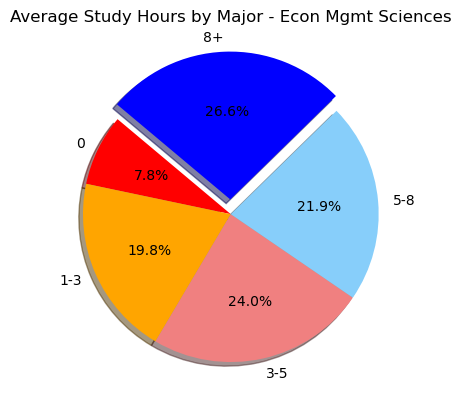

In [16]:
# Labels for the sections of our pie chart (ECONOMIC & MANAGEMENT SCIENCES)
labels = ["0", "1-3", "3-5", "5-8", "8+"]

# The values of each section of the pie chart
sizes = [15, 38, 46, 42, 51]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "blue"]

# Tells matplotlib to separate the higher section from the others
explode = (0, 0, 0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('Average Study Hours by Major - Econ Mgmt Sciences')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

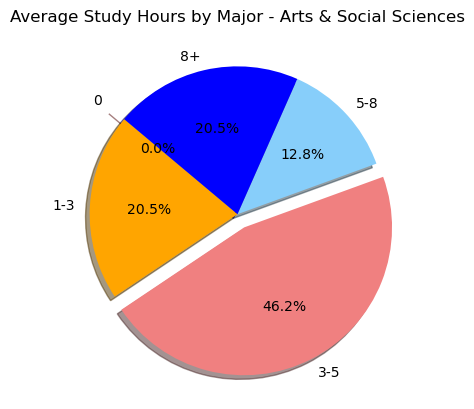

In [17]:
# Labels for the sections of our pie chart (ARTS & SOCIAL SCIENCES)
labels = ["0", "1-3", "3-5", "5-8", "8+"]

# The values of each section of the pie chart
sizes = [0, 8, 18, 5, 8]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "blue"]

# Tells matplotlib to separate the higher section from the others
explode = (0.1, 0, 0.1, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('Average Study Hours by Major - Arts & Social Sciences')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

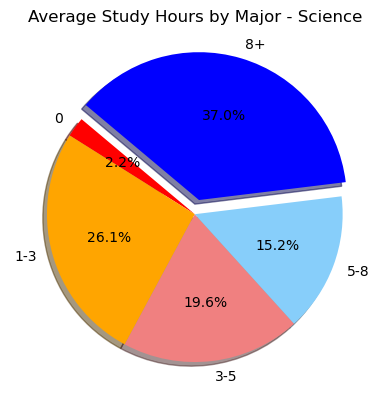

In [18]:
# Labels for the sections of our pie chart (SCIENCE)
labels = ["0", "1-3", "3-5", "5-8", "8+"]

# The values of each section of the pie chart
sizes = [1, 12, 9, 7, 17]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "blue"]

# Tells matplotlib to separate the higher section from the others
explode = (0, 0, 0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('Average Study Hours by Major - Science')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

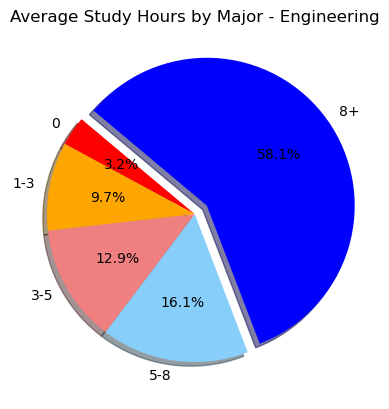

In [19]:
# Labels for the sections of our pie chart (ENGINEERING)
labels = ["0", "1-3", "3-5", "5-8", "8+"]

# The values of each section of the pie chart
sizes = [1, 3, 4, 5, 18]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "blue"]

# Tells matplotlib to separate the higher section from the others
explode = (0, 0, 0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('Average Study Hours by Major - Engineering')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

C:\Users\tippi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


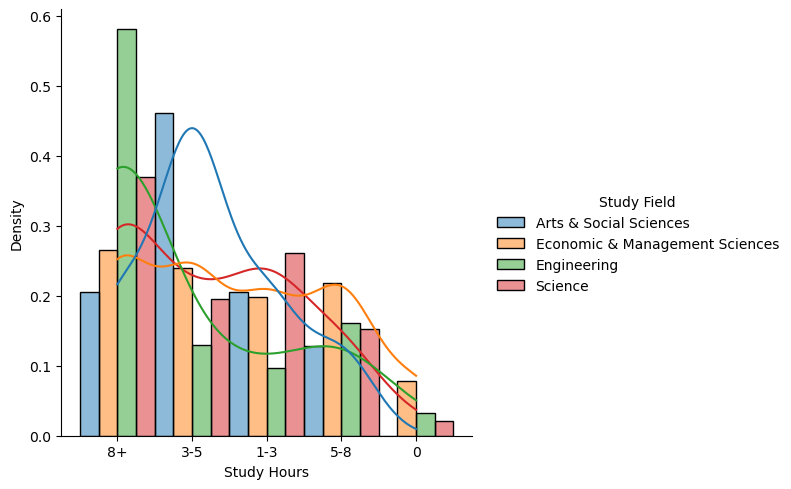

In [20]:
sns.displot(df_narrowed, x="Study Hours", hue="Study Field", multiple="dodge", stat="density", common_norm=False, kde=True)

In [21]:
# Change categorical to nurmerical for violin plot
new={'0': 0,'1-3': 3, '3-5': 5, '5-8': 8,'8+': 11}
field_data3['Drinks Consumed']=field_data3["Drinks Consumed"].replace(new)

field_data3

,Study Field,Drinks Consumed,Drink Count,Study Hours,Study Count
0,Arts & Social Sciences,11,9,8+,8
1,Economic & Management Sciences,5,36,8+,51
2,AgriSciences,11,7,3-5,4
3,Engineering,11,6,3-5,4
4,Arts & Social Sciences,8,12,3-5,18
...,...,...,...,...,...
346,Economic & Management Sciences,3,45,5-8,42
347,Economic & Management Sciences,11,48,5-8,42
348,Other,5,3,5-8,1
349,Economic & Management Sciences,8,54,1-3,38


In [22]:
# Narrow down dataset to include specific majors
required_fields = ["Economic & Management Sciences", "Science", "Arts & Social Sciences", "Engineering"]
df_narrowed2 = field_data3.loc[field_data3["Study Field"].isin(required_fields)]

df_narrowed2

,Study Field,Drinks Consumed,Drink Count,Study Hours,Study Count
0,Arts & Social Sciences,11,9,8+,8
1,Economic & Management Sciences,5,36,8+,51
3,Engineering,11,6,3-5,4
4,Arts & Social Sciences,8,12,3-5,18
5,Engineering,5,9,8+,18
...,...,...,...,...,...
343,Economic & Management Sciences,11,48,0,15
345,Economic & Management Sciences,5,36,5-8,42
346,Economic & Management Sciences,3,45,5-8,42
347,Economic & Management Sciences,11,48,5-8,42


<Axes: xlabel='Study Field', ylabel='Drinks Consumed'>

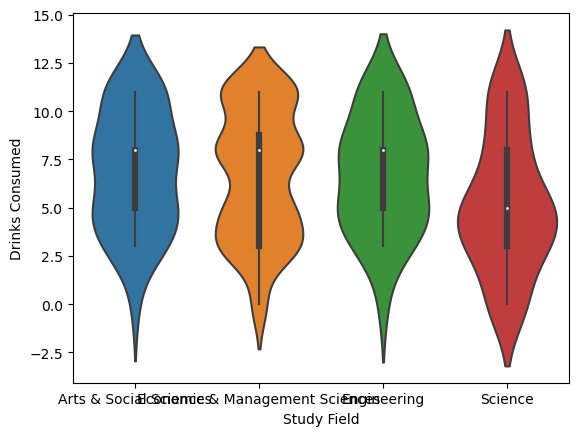

In [23]:
sns.violinplot(data=df_narrowed2, x="Study Field", y="Drinks Consumed")